# Import the libraries and load the image

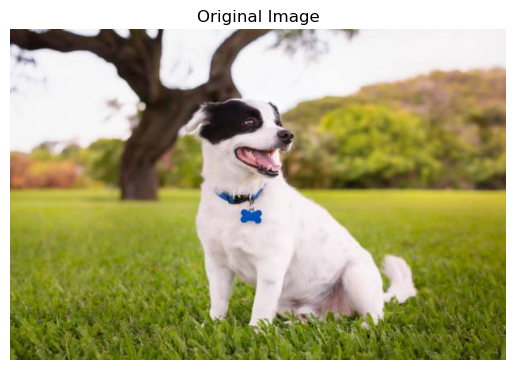

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#uploading an image
img = cv2.imread('puppy.jpg')
plt.axis("off")
plt.title("Original Image")  
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()



# # Compute the histogram and plot

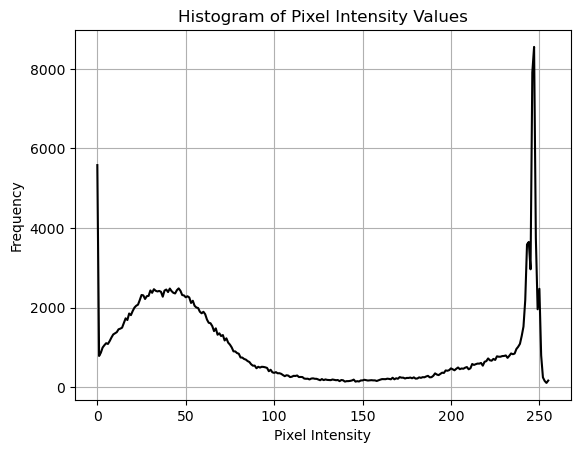

In [2]:

histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.plot(histogram, color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensity Values')
plt.grid(True)
plt.show()

(-0.5, 611.5, 407.5, -0.5)

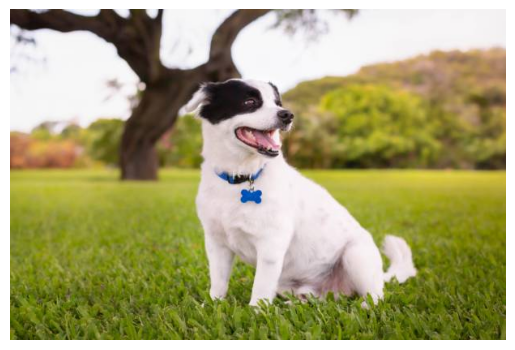

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")

In [4]:
# color conversion from RGB (Red, Green, Blue) to grayscale 

In [5]:
gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image)
plt.axis("off")


(-0.5, 611.5, 407.5, -0.5)

In [6]:
height, width = img.shape[:2]

In [7]:
height,width

(408, 612)

# resizing the image

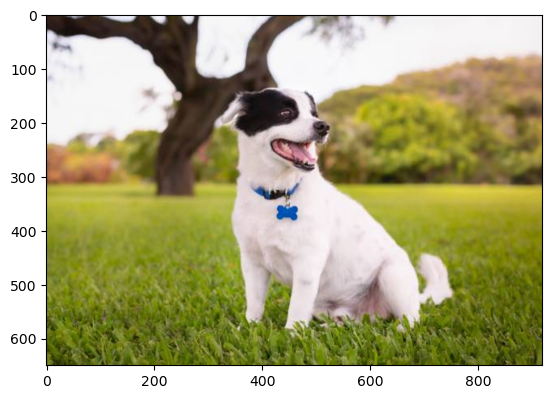

In [9]:
resized_img = cv2.resize(src =img,
                          dsize=(920, 650),
                          interpolation=cv2.INTER_CUBIC)
plt.imshow(resized_img)


# Displaying the Blurred Image

In [11]:
gaussian_image = cv2.GaussianBlur(resized_img, (15, 15), 0)
plt.imshow(gaussian_image)


# Applying Canny Edge Detection
Zero Crossing Detector:Scharr Operator,Canny Edge Detection
    Robert's Cross Operator:Laplacian of Gaussian (LoG):Sobel Operator:Prewitt Operator

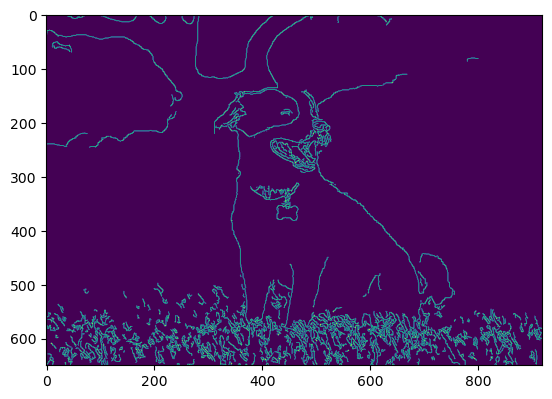

In [12]:
edge = cv2.Canny(resized_img, 100, 200)
plt.imshow(edge)

# brightness

In [13]:
brightness = cv2.addWeighted(resized_img, 1.2, resized_img, 0, 70)
plt.imshow(brightness)

# Image Sharpen

In [14]:
import numpy as np

In [15]:
def sharpen_image(image):
    kernel = np.array([[-1, -1, -1],
                       [-1, 9, -1],
                       [-1, -1, -1]])
    return cv2.filter2D(image, -1, kernel)


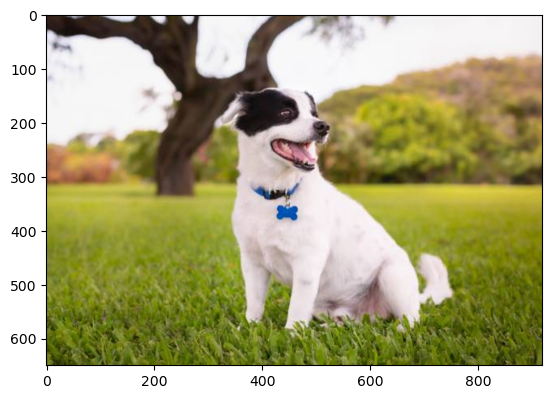

In [16]:
sharpened_image = sharpen_image(resized_img)
plt.imshow(resized_img)

In [17]:
original_and_sharpened_image = np.hstack((resized_img, sharpened_image))

plt.figure(figsize = [30, 30])
plt.axis('off')
plt.imshow(original_and_sharpened_image[:,:,::-1])

# data Augmentation

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [19]:
# Path to the directory containing your images
input_dir = 'data'
# Initialize ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotation angle range (degrees)
    width_shift_range=0.1,  # Fractional shift in the width direction
    height_shift_range=0.1, # Fractional shift in the height direction
    shear_range=0.2,        # Shear intensity (angle in radians)
    zoom_range=0.2,         # Range for random zoom
    horizontal_flip=True,   # Randomly flip inputs horizontally
    vertical_flip=True,     # Randomly flip inputs vertically
    fill_mode='nearest'     # Strategy for filling in newly created pixels
)

# Load an example image to use for augmentation
img = load_img('bird.png')  # Update with your image path
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Generate augmented images
num_images =10
augmented_images = []

# Generate augmented images using the datagen.flow() method
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    augmented_images.append(array_to_img(batch[0]))
    if i >= num_images - 1:
        break

# Display the original image and augmented images
plt.figure(figsize=(15, 6))
plt.subplot(1, num_images + 1, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

for i in range(num_images):
    plt.subplot(1, num_images + 1, i + 2)
    plt.imshow(augmented_images[i])
    plt.title(f'Augmented Image {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Histogram Equalization

C:\Users\ADMIN\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


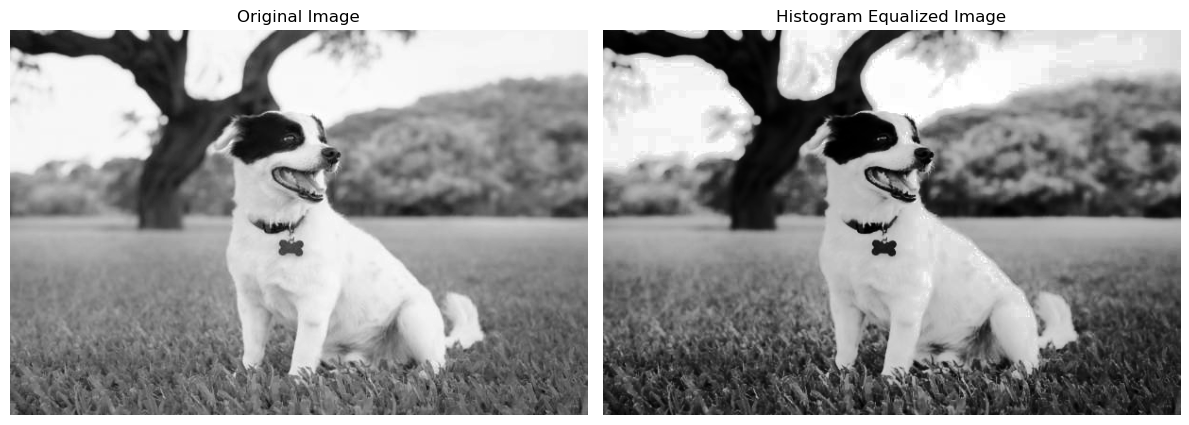

In [20]:
import matplotlib.pyplot as plt
from skimage import io, exposure

# Load an image (replace 'input_image.jpg' with your image file path)
input_image = io.imread('puppy.jpg', as_gray=True)

# Apply histogram equalization
equalized_image = exposure.equalize_hist(input_image)

# Display original and equalized images side by side
plt.figure(figsize=(12, 6))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the equalized image
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Edge Detected

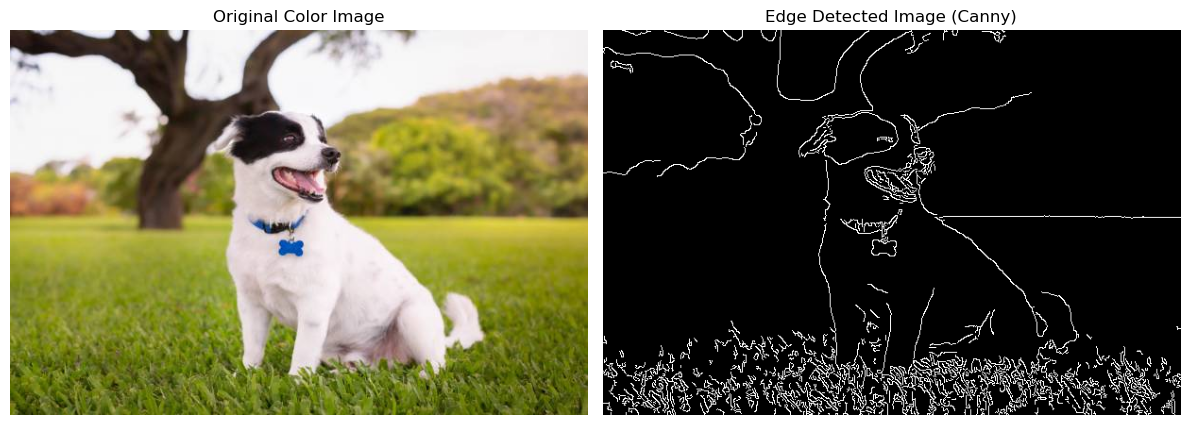

In [21]:
import cv2
import matplotlib.pyplot as plt

# Load a color image
input_image = cv2.imread('puppy.jpg')

# Convert the color image to grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, 100, 200)  # Adjust threshold values (100, 200) as needed

# Display original color image and edge-detected image
plt.figure(figsize=(12, 6))

# Plot the original color image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Original Color Image')
plt.axis('off')

# Plot the edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detected Image (Canny)')
plt.axis('off')

plt.tight_layout()
plt.show()

# #Morphological Operations (Erosion)

In [22]:
 #Morphological Operations (Erosion)
kernel = np.ones((5, 5), np.uint8)
eroded_image = cv2.erode(gray_image, kernel, iterations=1)
plt.subplot(2, 3, 6)
plt.imshow(eroded_image, cmap='gray')
plt.title('Morphological Operations (Erosion)')
plt.axis('off')

(-0.5, 611.5, 407.5, -0.5)

# Thresholding 

(-0.5, 611.5, 407.5, -0.5)

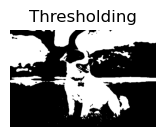

In [23]:
from skimage import filters
import matplotlib.pyplot as plt
# Thresholding (Simple Binary Thresholding)
thresh_value = filters.threshold_otsu(gray_image)
binary_image = gray_image > thresh_value
plt.subplot(2, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Thresholding')
plt.axis('off')